In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
data = pd.read_csv("parkinsons.data")


In [7]:

# Drop 'name' column (not useful for modeling)
data.drop(columns=['name'], inplace=True)

# Split features and target
X = data.drop(columns=['status'])  # Features
y = data['status']  # Target (0 = Healthy, 1 = Parkinson's)


In [8]:

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Hyperparameter tuning for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],   # Regularization strength
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly']  # Different kernel types
}



In [9]:

grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from GridSearch
best_svm = grid_search.best_estimator_

# Train best model on full training data
best_svm.fit(X_train, y_train)

# Predictions
y_pred = best_svm.predict(X_test)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [10]:

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best SVM Parameters: {grid_search.best_params_}")



Best SVM Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [11]:
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.9231


In [12]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.96      0.93      0.95        29

    accuracy                           0.92        39
   macro avg       0.89      0.92      0.90        39
weighted avg       0.93      0.92      0.92        39



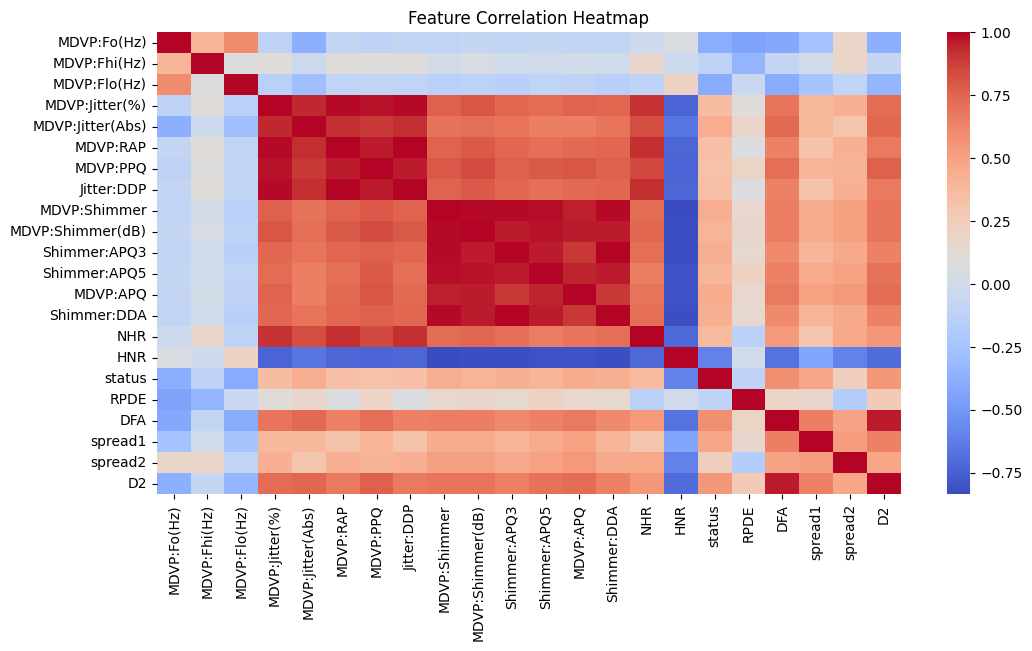

In [13]:

# --- PLOTS ---

# 1. Feature Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pd.DataFrame(X_scaled, columns=data.columns[:-1]).corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()



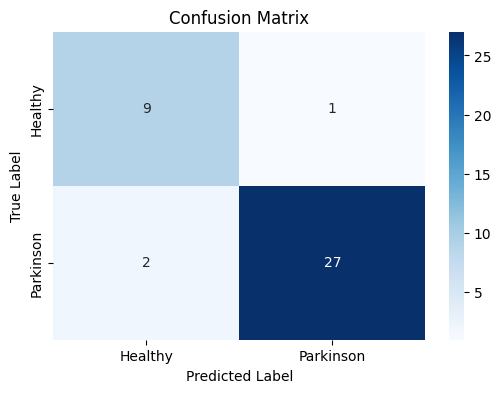

In [14]:
# 2. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Healthy", "Parkinson"], yticklabels=["Healthy", "Parkinson"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# --- NEW SAMPLE PREDICTION ---

In [22]:



# Example: A new sample voice recording (randomly taken from dataset)
new_sample = np.array([[116.014, 131.871, 111.289, 0.00268, 0.00003, 0.0013, 0.00152, 0.0039, 0.02211,
                        0.02308, 0.01047, 0.01243, 0.01636, 0.03121, 0.04345, 21.327, 0.456, 2.301, 
                        0.667, -1.648, 0.354,0.4]])

# Scale the new sample using the same StandardScaler
new_sample_scaled = scaler.transform(new_sample)

# Predict if the person has Parkinson’s or not
prediction = best_svm.predict(new_sample_scaled)
probability = best_svm.predict_proba(new_sample_scaled)[0][1]  # Probability of Parkinson's



C:\Users\harip\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
# Display Result
if prediction[0] == 1:
    print(f"Prediction: **Parkinson's Detected** (Probability: {probability:.2%})")
else:
    print(f"Prediction: **Healthy** (Probability: {1 - probability:.2%})")

Prediction: **Parkinson's Detected** (Probability: 84.58%)
